In [ ]:
# Load Kaggle dataset and assign descriptive name
loan_applications_df = pd.read_csv("train_public.csv")

# Basic preview
loan_applications_df.head()
loan_applications_df.info()
loan_applications_df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  censor_status             10000 non-null  int64  
 12  issue_date                10000 non-null  object 
 13  use                       10000 non-null  int64  
 14  post_co

,0
f1,858
work_year,622
f0,498
f2,498
f3,498
f4,498
pub_dero_bankrup,7
class,0
monthly_payment,0
interest,0


In [ ]:
import numpy as np

#  Impute 'work_year'
loan_applications_df['work_year'] = loan_applications_df['work_year'].replace('10+ years', '10 years')
loan_applications_df['work_year'] = loan_applications_df['work_year'].str.extract('(\d+)').astype(float)
loan_applications_df['work_year'] = loan_applications_df['work_year'].fillna(loan_applications_df['work_year'].median())

# Impute 'pub_dero_bankrup' and f0–f4 with median
for col in ['pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4']:
    loan_applications_df[col] = loan_applications_df[col].fillna(loan_applications_df[col].median())

# Feature Engineering
loan_applications_df['repayment_ratio'] = loan_applications_df['monthly_payment'] / loan_applications_df['total_loan']
loan_applications_df['score_range'] = loan_applications_df['scoring_high'] - loan_applications_df['scoring_low']

# Drop ID columns
loan_applications_df.drop(['loan_id', 'user_id', 'post_code', 'issue_date', 'earlies_credit_mon'], axis=1, inplace=True)

# Confirm shape
loan_applications_df.shape


(10000, 36)

In [ ]:
# One-hot encode categorical columns
loan_applications_df_encoded = pd.get_dummies(
    loan_applications_df,
    columns=['class', 'employer_type', 'industry'],
    drop_first=True  # avoid dummy variable trap
)

# Check new shape and confirm transformation
loan_applications_df_encoded.shape, loan_applications_df_encoded.columns


((10000, 57),
 Index(['total_loan', 'year_of_loan', 'interest', 'monthly_payment',
        'work_year', 'house_exist', 'censor_status', 'use', 'region',
        'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high',
        'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup',
        'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title',
        'policy_code', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return',
        'early_return_amount', 'early_return_amount_3mon', 'isDefault',
        'repayment_ratio', 'score_range', 'class_B', 'class_C', 'class_D',
        'class_E', 'class_F', 'class_G', 'employer_type_世界五百强',
        'employer_type_幼教与中小学校', 'employer_type_政府机构', 'employer_type_普通企业',
        'employer_type_高等教育机构', 'industry_住宿和餐饮业', 'industry_信息传输、软件和信息技术服务业',
        'industry_公共服务、社会组织', 'industry_农、林、牧、渔业', 'industry_制造业',
        'industry_国际组织', 'industry_建筑业', 'industry_房地产业', 'industry_批发和零售业',
        'industry_文化和体育业', 'industry_电力、热力生

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic info & summary
print("Shape:", loan_applications_df.shape)
print("\nSummary Statistics:\n", loan_applications_df.describe())
print("\nMissing Values:\n", loan_applications_df.isnull().sum())

# 2. Target variable distribution
sns.countplot(x='isDefault', data=loan_applications_df)
plt.title("Loan Default Distribution")
plt.show()

# 3. Histograms for key numeric features
loan_applications_df[['total_loan', 'monthly_payment', 'work_year']].hist(
    bins=20, figsize=(10, 4), edgecolor='black'
)
plt.suptitle("Feature Distributions")
plt.show()

# 4. Correlation heatmap (numeric columns only)
numeric_df = loan_applications_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


Confusion Matrix:
 [[1608   55]
 [ 250   87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      1663
           1       0.61      0.26      0.36       337

    accuracy                           0.85      2000
   macro avg       0.74      0.61      0.64      2000
weighted avg       0.82      0.85      0.82      2000

ROC AUC Score: 0.855


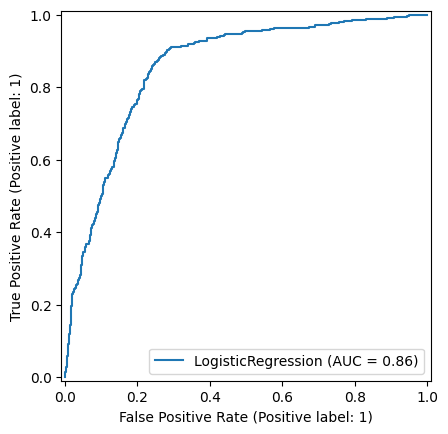

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Split features and target
X = loan_applications_df_encoded.drop(columns=['isDefault'])
y = loan_applications_df_encoded['isDefault']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

# Evaluate
y_pred = logreg.predict(X_test_scaled)
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_probs), 3))

# ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test)


Confusion Matrix:
 [[1587   76]
 [ 241   96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1663
           1       0.56      0.28      0.38       337

    accuracy                           0.84      2000
   macro avg       0.71      0.62      0.64      2000
weighted avg       0.82      0.84      0.82      2000


ROC AUC Score: 0.8695825177408102


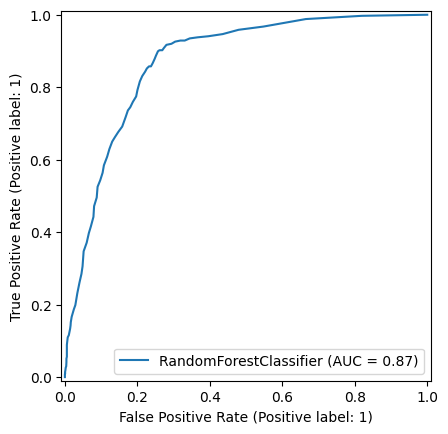

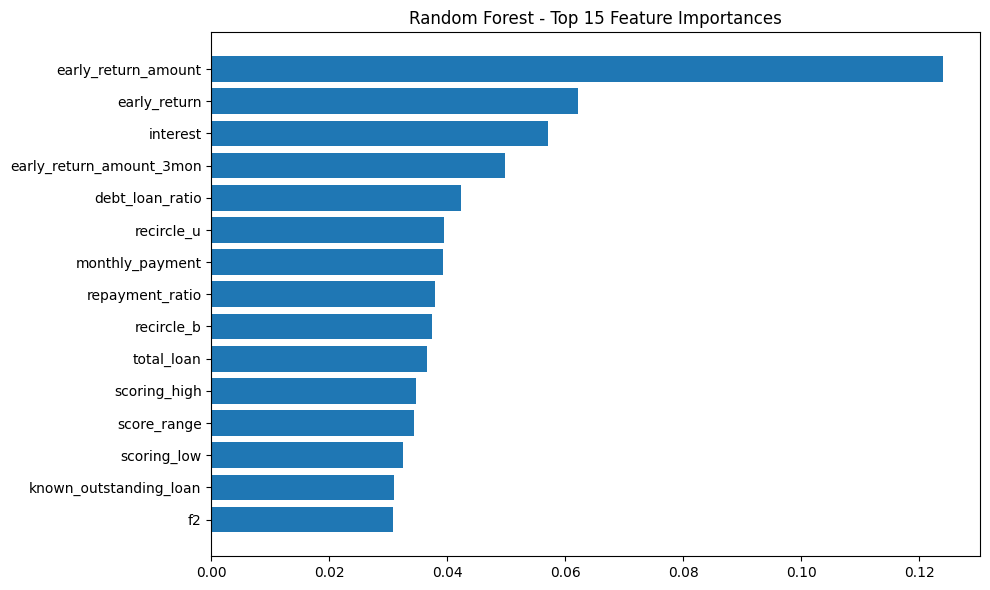

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

# Feature Importances (Top 15)
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1][:15]
features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(features[::-1], importances[indices][::-1])
plt.title("Random Forest - Top 15 Feature Importances")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
RF Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}

📈 Tuned RF Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1663
           1       0.63      0.22      0.33       337

    accuracy                           0.85      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.82      0.85      0.81      2000

Tuned RF ROC AUC Score: 0.874


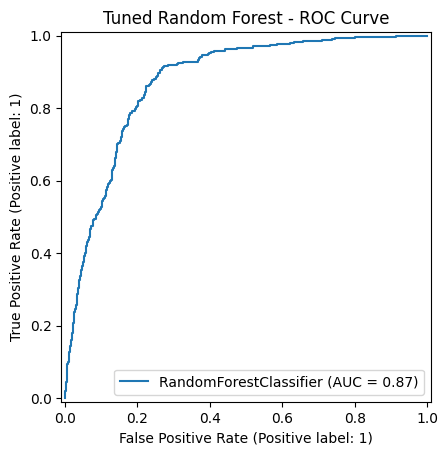

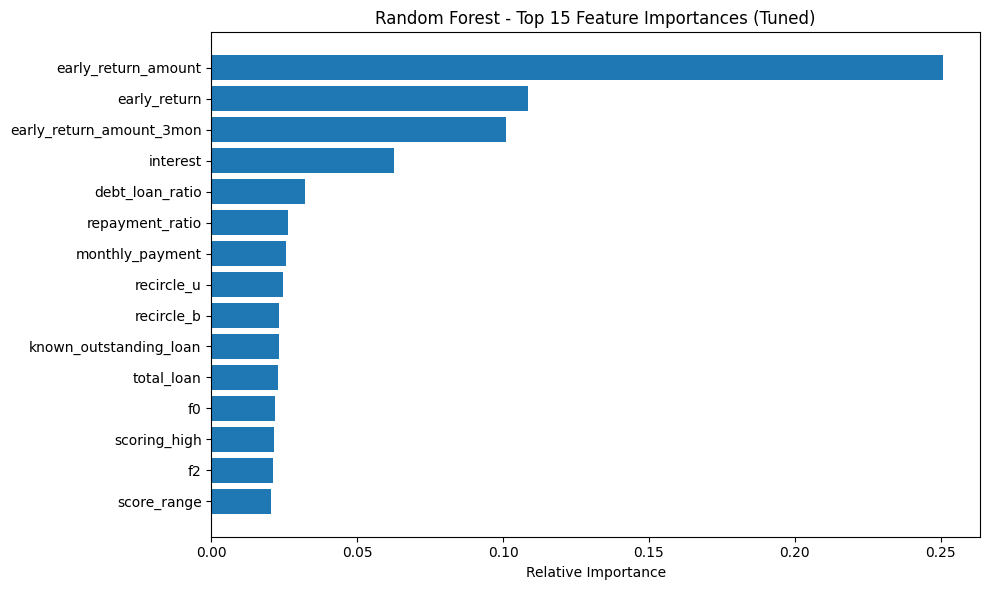

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 150],         # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 4]         # Minimum samples required to split a node
}

# Perform Grid Search with 3-fold cross-validation
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

# Retrieve the best model
best_rf_model = rf_grid.best_estimator_
print("RF Parameters:", rf_grid.best_params_)

# Evaluate tuned Random Forest
y_pred_rf = best_rf_model.predict(X_test)
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("\n📈 Tuned RF Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Tuned RF ROC AUC Score:", round(roc_auc_score(y_test, y_prob_rf), 3))

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title("Tuned Random Forest - ROC Curve")
plt.show()

# Plot Feature Importances (Top 15)
importances_rf = best_rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[-15:]
features_rf = [X.columns[i] for i in indices_rf]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), features_rf)
plt.title("Random Forest - Top 15 Feature Importances (Tuned)")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:38:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[1544  119]
 [ 214  123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1663
           1       0.51      0.36      0.42       337

    accuracy                           0.83      2000
   macro avg       0.69      0.65      0.66      2000
weighted avg       0.82      0.83      0.82      2000

ROC AUC Score: 0.8559


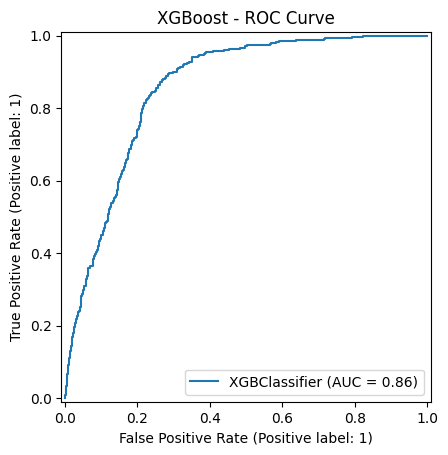

/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 34701 (\N{CJK UNIFIED IDEOGRAPH-878D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-65-2808160185.py:38: UserWarning: Glyph 36755 (\N{CJK UNIFIED I

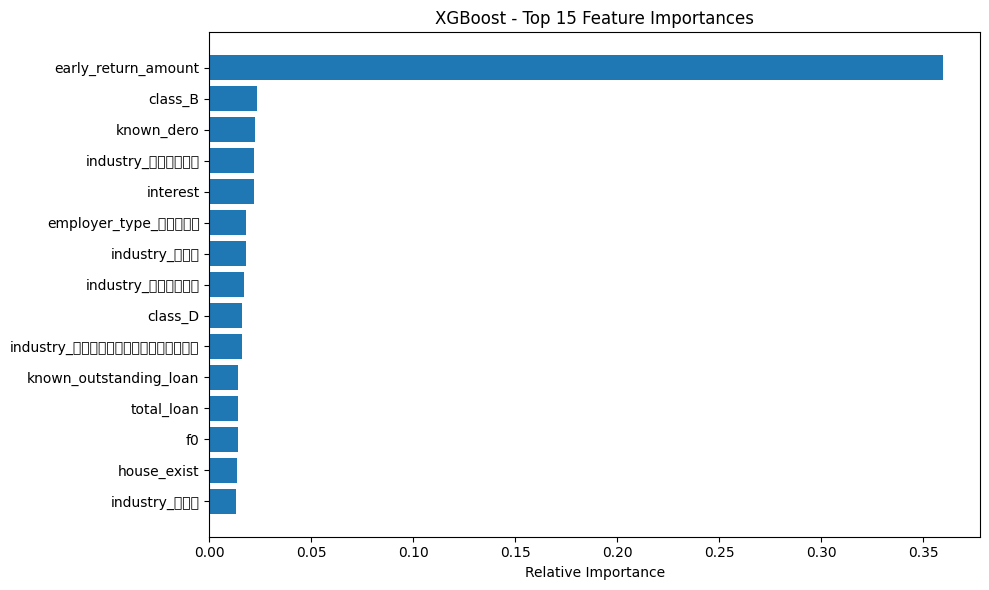

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize & Train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"ROC AUC Score: {auc_xgb:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost - ROC Curve")
plt.show()

# Feature Importances
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('XGBoost - Top 15 Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:38:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

 Tuned XGB Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1663
           1       0.61      0.30      0.40       337

    accuracy                           0.85      2000
   macro avg       0.74      0.63      0.66      2000
weighted avg       0.83      0.85      0.83      2000

 Tuned XGB ROC AUC Score: 0.874


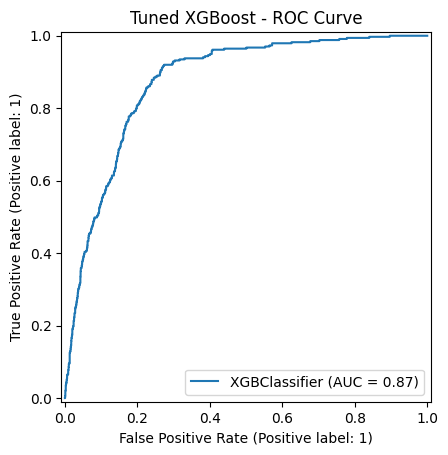

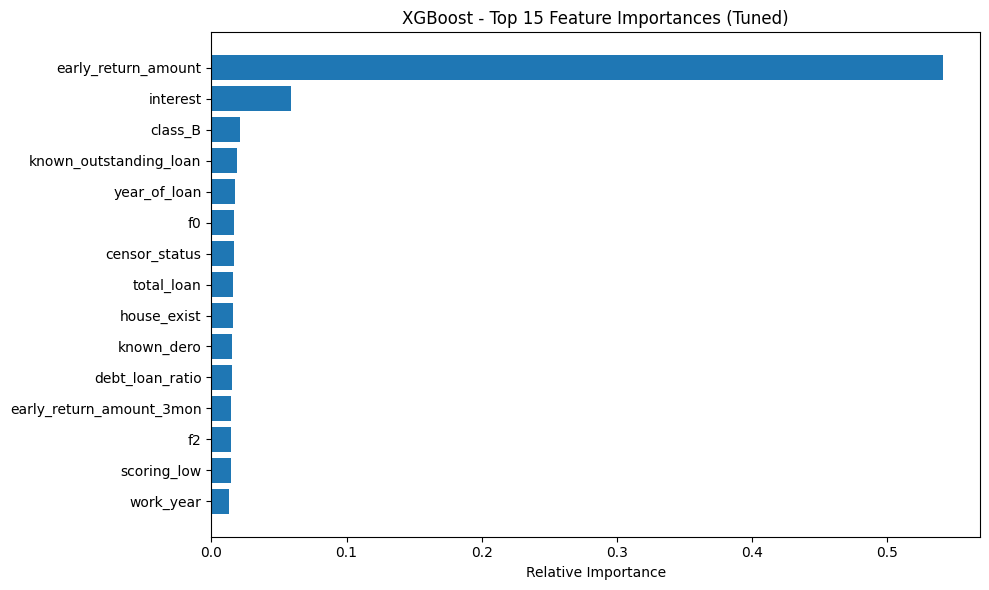

In [ ]:
from xgboost import XGBClassifier

# Define hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 150],         # Number of boosting rounds
    'max_depth': [3, 5],                # Maximum tree depth
    'learning_rate': [0.1, 0.05]        # Step size shrinkage
}

# Perform Grid Search with 3-fold cross-validation
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)

# Retrieve the best model
best_xgb_model = xgb_grid.best_estimator_
print("Best XGB Parameters:", xgb_grid.best_params_)

# Evaluate tuned XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

print("\n Tuned XGB Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(" Tuned XGB ROC AUC Score:", round(roc_auc_score(y_test, y_prob_xgb), 3))

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_xgb_model, X_test, y_test)
plt.title("Tuned XGBoost - ROC Curve")
plt.show()


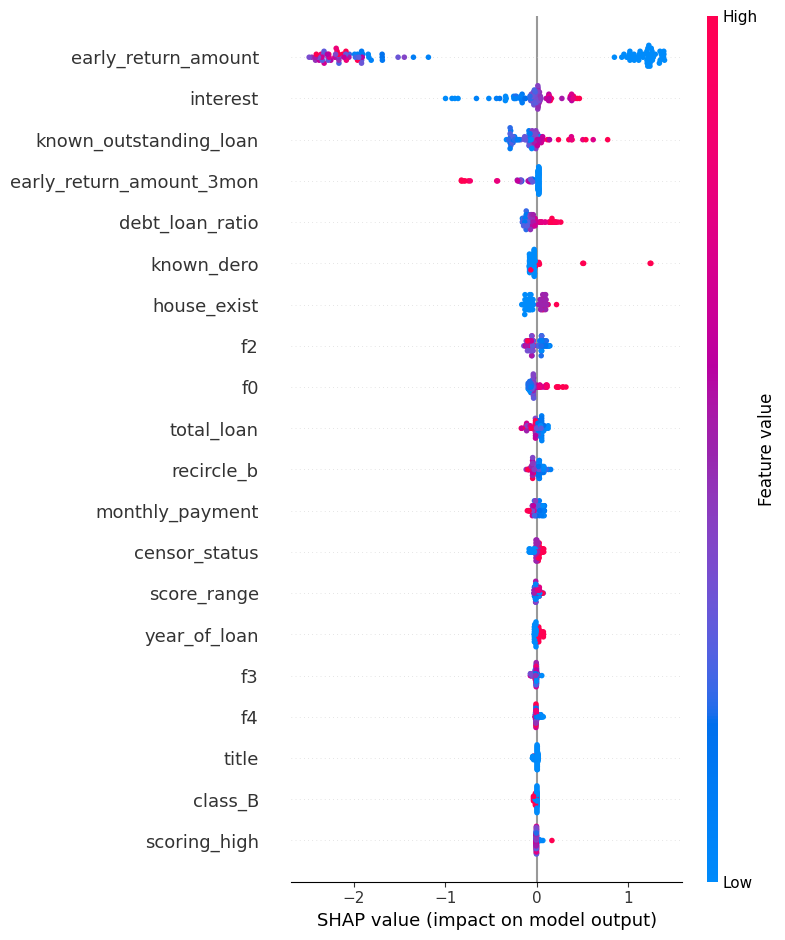

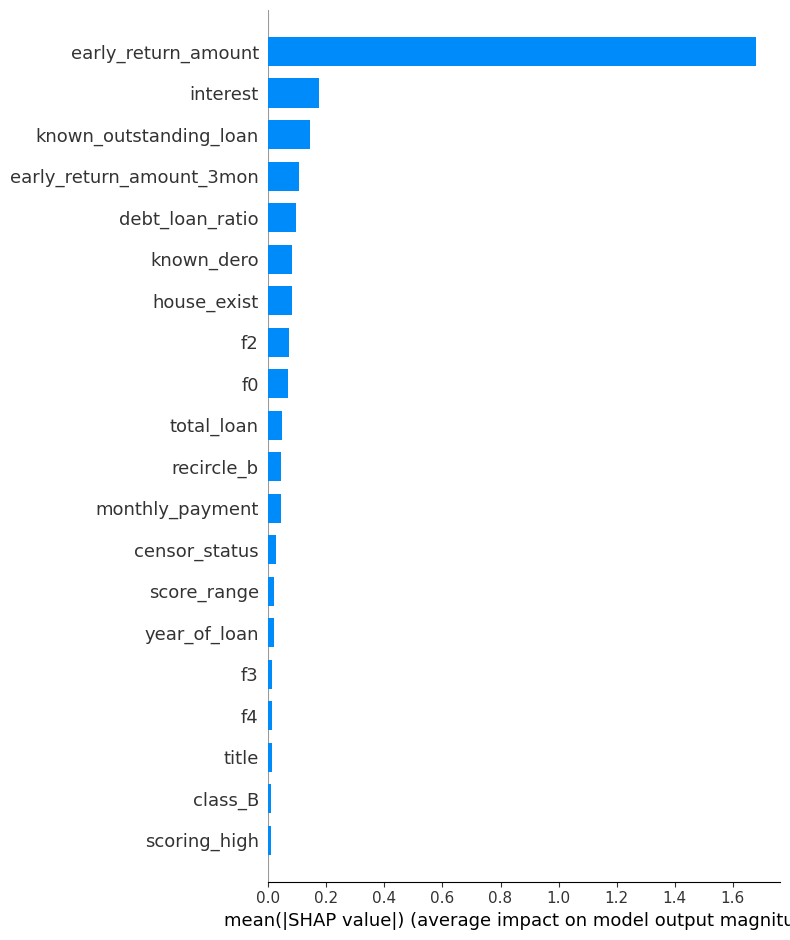

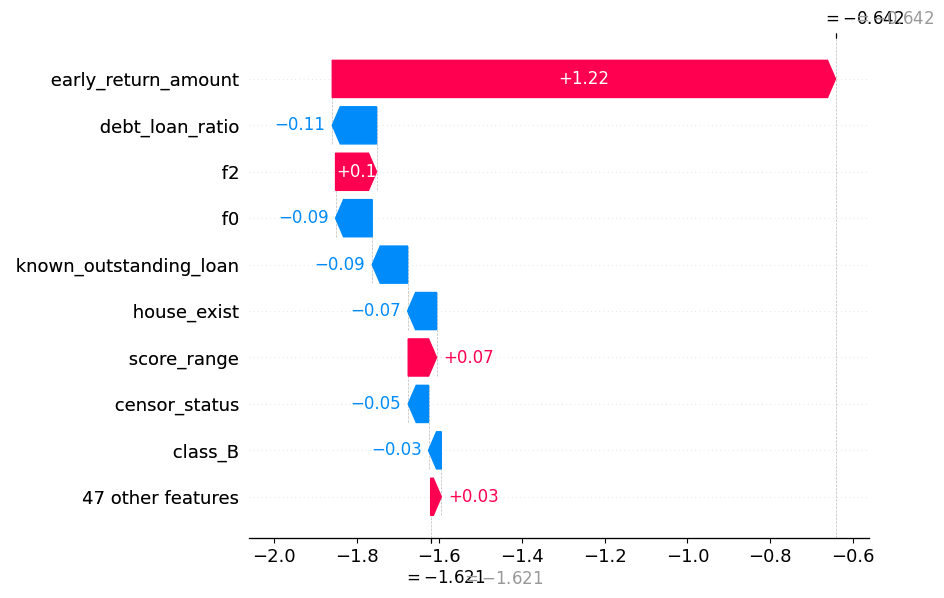

In [ ]:
import shap

# SHAP requires original feature names — use a sample for speed
X_sample_xgb = X_test.sample(100, random_state=42)

# Initialize SHAP explainer for XGBoost
explainer_xgb = shap.TreeExplainer(best_xgb_model)

# Compute SHAP values
shap_values_xgb = explainer_xgb.shap_values(X_sample_xgb)

# Plot SHAP beeswarm plot (distribution of SHAP values per feature)
shap.summary_plot(shap_values_xgb, X_sample_xgb, plot_type="dot", show=True)

# Global feature importance (bar chart)
shap.summary_plot(shap_values_xgb, X_sample_xgb, plot_type="bar", show=True)

# Optional: Local explanation (for 1 prediction)
shap.plots._waterfall.waterfall_legacy(
    explainer_xgb.expected_value,
    shap_values_xgb[0],
    X_sample_xgb.iloc[0]
)
